# TF-IDF

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


### Setting

In [2]:
import pandas as pd
import numpy as np

# csv_url = '/content/drive/MyDrive/Colab Notebooks/yanolja/data/hotel_review200_labeling_sample.csv' # 새롬
csv_url = '/content/drive/MyDrive/Codepresso/TeamProject/data/jeju_hotel_model_labeled.csv' # 다영
df = pd.read_csv(csv_url)
final_df = df.copy()

In [3]:
final_df

,Unnamed: 0,hotel,star,review,preprocessed_review,date,separate_review,sentiment
0,0,아트스테이 서귀포 하버,5,조용하고 좋아요 ~ 주변에 편의점이랑 주차장 올레시장 다 걸어서 갈수 있어서 좋아요,조용하고 좋아요 주변에 편의점이랑 주차장 올레시장 다 걸어서 갈수 있어서 좋아요,2021-08-05,조용하고 좋아요 주변에 편의점이랑 주차장 올레시장 다 걸어서 갈수 있어서 좋아요,1
1,1,호텔 케니 서귀포,5,도보로 1분 ?? 거리에 올레시장이 있어 무척이나 좋았습니다. 비가 와서 예상보다 ...,도보로 분 거리에 올레시장이 있어 무척이나 좋았습니다 비가 와서 예상보다 체크인을...,2020-09-29,서비스 친절도는 잘 모르겠고 수건도 하루에 최대 장 밖에 추가 안되고 방은 좁지만 ...,1
2,2,호텔 케니 서귀포,5,서귀포쪽가면 이용하는 곳이에요\n좀 좁은감은 있어도 전혀 무리없습니다,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,2020-10-16,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,1
3,3,호텔 케니 서귀포,5,서귀포쪽가면 이용하는 곳이에요\n좀 좁은감은 있어도 전혀 무리없습니다,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,2020-10-16,서귀포 쭉 가면 이용하는 곳이,1
4,4,호텔 케니 서귀포,5,서귀포쪽가면 이용하는 곳이에요\n좀 좁은감은 있어도 전혀 무리없습니다,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,2020-10-16,좀 좁은 감은 있어도 전혀 무리 없,0
...,...,...,...,...,...,...,...,...
16592,16592,호텔 케니 서귀포,1,주차시설협소 위생더럽 특히나 침대시트 \n진짜 찝찝하구요 모기많구요 진심 어디서 들...,주차시설 협소 위생더럽 특히나 침대 시트 진짜 찝찝하고요 모기 많고요 진심 어디서 ...,2019-08-29,방음 처리도 안 좋,1
16593,16593,호텔 케니 서귀포,1,주차시설협소 위생더럽 특히나 침대시트 \n진짜 찝찝하구요 모기많구요 진심 어디서 들...,주차시설 협소 위생더럽 특히나 침대 시트 진짜 찝찝하고요 모기 많고요 진심 어디서 ...,2019-08-29,펼쳐지지 않,0
16594,16594,에벤에셀 제주 함덕호텔,1,오늘 1박째입니다\n여기 2박으로 예약한 ..진심후회합니다\n직원분들 폰 하기 바...,오늘 박 째입니다 여기 박으로 예약한 진심 후회합니다 직원분들 폰 하기 바빠서 ...,2019-10-09,네요 일반 모텔보다 못한 시설에 욕실 세면기는 고장입니다 이곳이 왜 호텔인지 의문스럽,0
16595,16595,더큐브 리조트 제주,1,청결 상태 최악입니다. 대충 눈에 보이는 곳만 청소하는지 여기저기 머리카락에 ...,청결 상태 최악입니다 대충 눈에 보이는 곳만 청소하는지 여기저기 머리카락에 먼...,2021-06-06,청결 상태 최악입니다 대충 눈에 보이는 곳만 청소하는지 여기저기 머리카락에 먼...,0


In [4]:
dict_df = final_df.groupby('hotel')['preprocessed_review'].apply(list).to_dict()

# key : 호텔명 가져오기
hotel_list = list(dict_df.keys())
len(hotel_list)

31

# 유용한 리뷰

In [5]:
# preprocessed_review 컬럼 중간값 체크
medi = []
for i in range(len(final_df['preprocessed_review'])): # copy_df는 테스트 데이터셋(현재 6200개) 적용해야 함
  medi.append(len(final_df['preprocessed_review'][i]))
medi.sort()

len_medi = 0
if len(medi) % 2 ==0: # 개수가 짝수면 (n/2번째 데이터+ n/2+1번째 데이터)/2
  len_medi = (medi[int(len(medi)/2)] + medi[int(len(medi)/2)+1]) / 2
else: # 개수가 홀수면
  len_medi = medi[int(len(medi)/2)]

len_medi

57

In [6]:
# 키워드
keyword =  ['깨끗', '깔끔', '청결', '청소', '먼지', '냄새', '쾌적', # 청결
            '친절', '직원', '서비스', '프런트', '응대', '업그레이드', '예약', '체크인', # 서비스
            '가격', '가성비', '저렴', # 가격
            '위치', '공항', '접근성', '시장', '주변', '근처', '바다', '경치', '오션', '시내',  # 위치
            '시설', '객실', '수영장', '조식', '화장실', '식당', '샤워', '수압', '욕조', '칫솔', '에어컨', '침구', '수건', '미니바', '테라스', '온수', # 시설
            '주차', '주차장', '편의점', '리조트', '음식점', '도보', '거리', '주변', '교통', # 접근성
            '소리', '방음', '조용' # 소음
]

# 제주호텔 리뷰 helpful칼럼 생성
final_df['helpful'] = 0

for i in range(len(final_df)):
  keyword_count = 0
  for k in keyword:
    if k in final_df['preprocessed_review'][i]:
      keyword_count+=1
  if keyword_count >= 2 or (keyword_count == 1 and len(final_df['preprocessed_review'][i])>=len_medi):
    final_df['helpful'][i] = 1

final_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Unnamed: 0,hotel,star,review,preprocessed_review,date,separate_review,sentiment,helpful
0,0,아트스테이 서귀포 하버,5,조용하고 좋아요 ~ 주변에 편의점이랑 주차장 올레시장 다 걸어서 갈수 있어서 좋아요,조용하고 좋아요 주변에 편의점이랑 주차장 올레시장 다 걸어서 갈수 있어서 좋아요,2021-08-05,조용하고 좋아요 주변에 편의점이랑 주차장 올레시장 다 걸어서 갈수 있어서 좋아요,1,1
1,1,호텔 케니 서귀포,5,도보로 1분 ?? 거리에 올레시장이 있어 무척이나 좋았습니다. 비가 와서 예상보다 ...,도보로 분 거리에 올레시장이 있어 무척이나 좋았습니다 비가 와서 예상보다 체크인을...,2020-09-29,서비스 친절도는 잘 모르겠고 수건도 하루에 최대 장 밖에 추가 안되고 방은 좁지만 ...,1,1
2,2,호텔 케니 서귀포,5,서귀포쪽가면 이용하는 곳이에요\n좀 좁은감은 있어도 전혀 무리없습니다,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,2020-10-16,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,1,0
3,3,호텔 케니 서귀포,5,서귀포쪽가면 이용하는 곳이에요\n좀 좁은감은 있어도 전혀 무리없습니다,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,2020-10-16,서귀포 쭉 가면 이용하는 곳이,1,0
4,4,호텔 케니 서귀포,5,서귀포쪽가면 이용하는 곳이에요\n좀 좁은감은 있어도 전혀 무리없습니다,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,2020-10-16,좀 좁은 감은 있어도 전혀 무리 없,0,0
...,...,...,...,...,...,...,...,...,...
16592,16592,호텔 케니 서귀포,1,주차시설협소 위생더럽 특히나 침대시트 \n진짜 찝찝하구요 모기많구요 진심 어디서 들...,주차시설 협소 위생더럽 특히나 침대 시트 진짜 찝찝하고요 모기 많고요 진심 어디서 ...,2019-08-29,방음 처리도 안 좋,1,1
16593,16593,호텔 케니 서귀포,1,주차시설협소 위생더럽 특히나 침대시트 \n진짜 찝찝하구요 모기많구요 진심 어디서 들...,주차시설 협소 위생더럽 특히나 침대 시트 진짜 찝찝하고요 모기 많고요 진심 어디서 ...,2019-08-29,펼쳐지지 않,0,1
16594,16594,에벤에셀 제주 함덕호텔,1,오늘 1박째입니다\n여기 2박으로 예약한 ..진심후회합니다\n직원분들 폰 하기 바...,오늘 박 째입니다 여기 박으로 예약한 진심 후회합니다 직원분들 폰 하기 바빠서 ...,2019-10-09,네요 일반 모텔보다 못한 시설에 욕실 세면기는 고장입니다 이곳이 왜 호텔인지 의문스럽,0,1
16595,16595,더큐브 리조트 제주,1,청결 상태 최악입니다. 대충 눈에 보이는 곳만 청소하는지 여기저기 머리카락에 ...,청결 상태 최악입니다 대충 눈에 보이는 곳만 청소하는지 여기저기 머리카락에 먼...,2021-06-06,청결 상태 최악입니다 대충 눈에 보이는 곳만 청소하는지 여기저기 머리카락에 먼...,0,1


# 긍부정 적용

In [7]:
# 하위 키워드를 상위 키워드로 교체

keyword_list = ['청결', '서비스', '가격', '위치', '시설', '접근성', '방음'] 

clean = ['깨끗', '깔끔', '청결', '청소', '먼지', '냄새', '쾌적']
service = ['친절', '직원', '서비스', '프런트', '응대', '업그레이드', '예약', '체크인']
cost = ['가격', '가성비', '저렴']
location = ['위치', '공항', '접근성', '시장', '주변', '근처', '바다', '경치', '오션', '시내']
facility = ['시설', '객실', '수영장', '조식', '화장실', '식당', '샤워', '수압', '욕조', '칫솔', '에어컨', '침구', '수건',  '미니바', '테라스', '온수']
accessibility = ['주차', '주차장', '편의점', '리조트', '음식점', '도보', '거리', '주변', '교통']
noise = ['소리', '방음', '조용']

for i in range(len(final_df)):
  for j in range(len(clean)):
    if clean[j] in final_df['separate_review'][i]:
      final_df['separate_review'][i] = final_df['separate_review'][i].replace(clean[j], " 청결 ")
  for j in range(len(service)):
    if service[j] in final_df['separate_review'][i]:
      final_df['separate_review'][i] = final_df['separate_review'][i].replace(service[j], " 서비스 ")
  for j in range(len(cost)):
    if cost[j] in final_df['separate_review'][i]:
      final_df['separate_review'][i] = final_df['separate_review'][i].replace(cost[j], " 가격 ")
  for j in range(len(location)):
    if location[j] in final_df['separate_review'][i]:
      final_df['separate_review'][i] = final_df['separate_review'][i].replace(location[j], " 위치 ")
  for j in range(len(facility)):
    if facility[j] in final_df['separate_review'][i]:
      final_df['separate_review'][i] = final_df['separate_review'][i].replace(facility[j], " 시설 ")
  for j in range(len(accessibility)):
    if accessibility[j] in final_df['separate_review'][i]:
      final_df['separate_review'][i] = final_df['separate_review'][i].replace(accessibility[j], " 접근성 ")
  for j in range(len(noise)):
    if noise[j] in final_df['separate_review'][i]:
      final_df['separate_review'][i] = final_df['separate_review'][i].replace(noise[j], " 방음 ")

final_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to b

,Unnamed: 0,hotel,star,review,preprocessed_review,date,separate_review,sentiment,helpful
0,0,아트스테이 서귀포 하버,5,조용하고 좋아요 ~ 주변에 편의점이랑 주차장 올레시장 다 걸어서 갈수 있어서 좋아요,조용하고 좋아요 주변에 편의점이랑 주차장 올레시장 다 걸어서 갈수 있어서 좋아요,2021-08-05,방음 하고 좋아요 위치 에 접근성 이랑 접근성 장 올레 위치 다 걸어서 ...,1,1
1,1,호텔 케니 서귀포,5,도보로 1분 ?? 거리에 올레시장이 있어 무척이나 좋았습니다. 비가 와서 예상보다 ...,도보로 분 거리에 올레시장이 있어 무척이나 좋았습니다 비가 와서 예상보다 체크인을...,2020-09-29,서비스 서비스 도는 잘 모르겠고 시설 도 하루에 최대 장 밖에 추가 안되...,1,1
2,2,호텔 케니 서귀포,5,서귀포쪽가면 이용하는 곳이에요\n좀 좁은감은 있어도 전혀 무리없습니다,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,2020-10-16,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,1,0
3,3,호텔 케니 서귀포,5,서귀포쪽가면 이용하는 곳이에요\n좀 좁은감은 있어도 전혀 무리없습니다,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,2020-10-16,서귀포 쭉 가면 이용하는 곳이,1,0
4,4,호텔 케니 서귀포,5,서귀포쪽가면 이용하는 곳이에요\n좀 좁은감은 있어도 전혀 무리없습니다,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,2020-10-16,좀 좁은 감은 있어도 전혀 무리 없,0,0
...,...,...,...,...,...,...,...,...,...
16592,16592,호텔 케니 서귀포,1,주차시설협소 위생더럽 특히나 침대시트 \n진짜 찝찝하구요 모기많구요 진심 어디서 들...,주차시설 협소 위생더럽 특히나 침대 시트 진짜 찝찝하고요 모기 많고요 진심 어디서 ...,2019-08-29,방음 처리도 안 좋,1,1
16593,16593,호텔 케니 서귀포,1,주차시설협소 위생더럽 특히나 침대시트 \n진짜 찝찝하구요 모기많구요 진심 어디서 들...,주차시설 협소 위생더럽 특히나 침대 시트 진짜 찝찝하고요 모기 많고요 진심 어디서 ...,2019-08-29,펼쳐지지 않,0,1
16594,16594,에벤에셀 제주 함덕호텔,1,오늘 1박째입니다\n여기 2박으로 예약한 ..진심후회합니다\n직원분들 폰 하기 바...,오늘 박 째입니다 여기 박으로 예약한 진심 후회합니다 직원분들 폰 하기 바빠서 ...,2019-10-09,네요 일반 모텔보다 못한 시설 에 욕실 세면기는 고장입니다 이곳이 왜 호텔인지 ...,0,1
16595,16595,더큐브 리조트 제주,1,청결 상태 최악입니다. 대충 눈에 보이는 곳만 청소하는지 여기저기 머리카락에 ...,청결 상태 최악입니다 대충 눈에 보이는 곳만 청소하는지 여기저기 머리카락에 먼...,2021-06-06,청결 상태 최악입니다 대충 눈에 보이는 곳만 청결 하는지 여기저기 머리카...,0,1


In [8]:
# 긍정인 데이터만 분류
final_df = final_df[final_df['sentiment'] == 1] # 122554개
final_df
#final_df = final_df[final_df['sentiment'] == '긍정'] # 5392개
#final_df.head()

,Unnamed: 0,hotel,star,review,preprocessed_review,date,separate_review,sentiment,helpful
0,0,아트스테이 서귀포 하버,5,조용하고 좋아요 ~ 주변에 편의점이랑 주차장 올레시장 다 걸어서 갈수 있어서 좋아요,조용하고 좋아요 주변에 편의점이랑 주차장 올레시장 다 걸어서 갈수 있어서 좋아요,2021-08-05,방음 하고 좋아요 위치 에 접근성 이랑 접근성 장 올레 위치 다 걸어서 ...,1,1
1,1,호텔 케니 서귀포,5,도보로 1분 ?? 거리에 올레시장이 있어 무척이나 좋았습니다. 비가 와서 예상보다 ...,도보로 분 거리에 올레시장이 있어 무척이나 좋았습니다 비가 와서 예상보다 체크인을...,2020-09-29,서비스 서비스 도는 잘 모르겠고 시설 도 하루에 최대 장 밖에 추가 안되...,1,1
2,2,호텔 케니 서귀포,5,서귀포쪽가면 이용하는 곳이에요\n좀 좁은감은 있어도 전혀 무리없습니다,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,2020-10-16,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,1,0
3,3,호텔 케니 서귀포,5,서귀포쪽가면 이용하는 곳이에요\n좀 좁은감은 있어도 전혀 무리없습니다,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,2020-10-16,서귀포 쭉 가면 이용하는 곳이,1,0
5,5,호텔 케니 서귀포,5,시장근처다 보니까 먹을건 많아요 숙소는 깡ㅣ깔끔해서 좋았는데 모기많아요.,시장 근처다 보니까 먹을 건 많아요 숙소는 깡 깔끔해서 좋았는데 모기 많아요,2020-10-13,청결 하고 있을 거 다 있고요,1,1
...,...,...,...,...,...,...,...,...,...
16571,16571,호텔 컬리넌 제주,1,체크인 체크아웃시간이 있는데 아침부터 청소하고 층간 벽간소음 개심함 체크아웃시간 전...,체크인 체크아웃 시간이 있는데 아침부터 청소하고 층간 벽간 소음 개심함 체크아웃 시...,2020-06-21,분위기도 좋고 위치 도 좋아서 두 번째 방문인데 역시나 만족입니다,1,1
16579,16579,라마다 제주시티 호텔,1,방 입실하자마자 담배댐새가 온 방에 쩐내남. 방 바꿔달라했지만 남는 방은 1개고 옆...,방 입실하자마자 담배 댐세가 온 방에 쩐내남 방 바꿔달라 했지만 남는 방은 개고 옆...,2021-08-04,가족끼리 머물기 좋은 곳 같아요,1,1
16580,16580,호텔 골든데이지 서귀포 오션,1,먼지가 너무 많아서 계속 콜록콜록에\n먼지떠다니는게 눈에 보이고 태풍불때가서 그런...,먼지가 너무 많아서 계속 콜록 콜록에 먼지 떠다니는 게 눈에 보이고 태풍 불때가서...,2019-10-07,서비스 분들도 서비스 하시고 루프탑도 마음에 들고 지하층에 접근성 이 ...,1,1
16585,16585,호텔 에어시티 제주,1,중앙난방이라서 방온도가 맞질않아요\n5일동안 창문열고 지냈네요. 객실에서 온도 조절...,중앙난방이라서 빵 온도가 맞질 않아 요일 동안 창문 열고 지냈네요 객실에서 온도 조...,2020-11-22,시설 은 청결 했지만 사용감이 약간 있는 정도,1,1


In [9]:
for i in range(len(keyword_list)):
  final_df[keyword_list[i]] = 0
final_df = final_df.reset_index()
final_df = final_df.drop([final_df.columns[0]], axis='columns')
final_df = final_df.drop([final_df.columns[0]], axis='columns')
final_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hotel,star,review,preprocessed_review,date,separate_review,sentiment,helpful,청결,서비스,가격,위치,시설,접근성,방음
0,아트스테이 서귀포 하버,5,조용하고 좋아요 ~ 주변에 편의점이랑 주차장 올레시장 다 걸어서 갈수 있어서 좋아요,조용하고 좋아요 주변에 편의점이랑 주차장 올레시장 다 걸어서 갈수 있어서 좋아요,2021-08-05,방음 하고 좋아요 위치 에 접근성 이랑 접근성 장 올레 위치 다 걸어서 ...,1,1,0,0,0,0,0,0,0
1,호텔 케니 서귀포,5,도보로 1분 ?? 거리에 올레시장이 있어 무척이나 좋았습니다. 비가 와서 예상보다 ...,도보로 분 거리에 올레시장이 있어 무척이나 좋았습니다 비가 와서 예상보다 체크인을...,2020-09-29,서비스 서비스 도는 잘 모르겠고 시설 도 하루에 최대 장 밖에 추가 안되...,1,1,0,0,0,0,0,0,0
2,호텔 케니 서귀포,5,서귀포쪽가면 이용하는 곳이에요\n좀 좁은감은 있어도 전혀 무리없습니다,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,2020-10-16,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,1,0,0,0,0,0,0,0,0
3,호텔 케니 서귀포,5,서귀포쪽가면 이용하는 곳이에요\n좀 좁은감은 있어도 전혀 무리없습니다,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,2020-10-16,서귀포 쭉 가면 이용하는 곳이,1,0,0,0,0,0,0,0,0
4,호텔 케니 서귀포,5,시장근처다 보니까 먹을건 많아요 숙소는 깡ㅣ깔끔해서 좋았는데 모기많아요.,시장 근처다 보니까 먹을 건 많아요 숙소는 깡 깔끔해서 좋았는데 모기 많아요,2020-10-13,청결 하고 있을 거 다 있고요,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12549,호텔 컬리넌 제주,1,체크인 체크아웃시간이 있는데 아침부터 청소하고 층간 벽간소음 개심함 체크아웃시간 전...,체크인 체크아웃 시간이 있는데 아침부터 청소하고 층간 벽간 소음 개심함 체크아웃 시...,2020-06-21,분위기도 좋고 위치 도 좋아서 두 번째 방문인데 역시나 만족입니다,1,1,0,0,0,0,0,0,0
12550,라마다 제주시티 호텔,1,방 입실하자마자 담배댐새가 온 방에 쩐내남. 방 바꿔달라했지만 남는 방은 1개고 옆...,방 입실하자마자 담배 댐세가 온 방에 쩐내남 방 바꿔달라 했지만 남는 방은 개고 옆...,2021-08-04,가족끼리 머물기 좋은 곳 같아요,1,1,0,0,0,0,0,0,0
12551,호텔 골든데이지 서귀포 오션,1,먼지가 너무 많아서 계속 콜록콜록에\n먼지떠다니는게 눈에 보이고 태풍불때가서 그런...,먼지가 너무 많아서 계속 콜록 콜록에 먼지 떠다니는 게 눈에 보이고 태풍 불때가서...,2019-10-07,서비스 분들도 서비스 하시고 루프탑도 마음에 들고 지하층에 접근성 이 ...,1,1,0,0,0,0,0,0,0
12552,호텔 에어시티 제주,1,중앙난방이라서 방온도가 맞질않아요\n5일동안 창문열고 지냈네요. 객실에서 온도 조절...,중앙난방이라서 빵 온도가 맞질 않아 요일 동안 창문 열고 지냈네요 객실에서 온도 조...,2020-11-22,시설 은 청결 했지만 사용감이 약간 있는 정도,1,1,0,0,0,0,0,0,0


In [10]:
# 리뷰별 키워드(존재하면 1, 없으면 0) 분류

for i in range(len(final_df)):
  for j in range(len(keyword_list)):
    if keyword_list[j] in final_df['preprocessed_review'][i]:
      keyword = keyword_list[j]
      final_df[keyword][i] = 1

final_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,hotel,star,review,preprocessed_review,date,separate_review,sentiment,helpful,청결,서비스,가격,위치,시설,접근성,방음
0,아트스테이 서귀포 하버,5,조용하고 좋아요 ~ 주변에 편의점이랑 주차장 올레시장 다 걸어서 갈수 있어서 좋아요,조용하고 좋아요 주변에 편의점이랑 주차장 올레시장 다 걸어서 갈수 있어서 좋아요,2021-08-05,방음 하고 좋아요 위치 에 접근성 이랑 접근성 장 올레 위치 다 걸어서 ...,1,1,0,0,0,0,0,0,0
1,호텔 케니 서귀포,5,도보로 1분 ?? 거리에 올레시장이 있어 무척이나 좋았습니다. 비가 와서 예상보다 ...,도보로 분 거리에 올레시장이 있어 무척이나 좋았습니다 비가 와서 예상보다 체크인을...,2020-09-29,서비스 서비스 도는 잘 모르겠고 시설 도 하루에 최대 장 밖에 추가 안되...,1,1,0,0,0,0,0,0,0
2,호텔 케니 서귀포,5,서귀포쪽가면 이용하는 곳이에요\n좀 좁은감은 있어도 전혀 무리없습니다,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,2020-10-16,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,1,0,0,0,0,0,0,0,0
3,호텔 케니 서귀포,5,서귀포쪽가면 이용하는 곳이에요\n좀 좁은감은 있어도 전혀 무리없습니다,서귀포 쭉 가면 이용하는 곳이에요 좀 좁은 감은 있어도 전혀 무리 없습니다,2020-10-16,서귀포 쭉 가면 이용하는 곳이,1,0,0,0,0,0,0,0,0
4,호텔 케니 서귀포,5,시장근처다 보니까 먹을건 많아요 숙소는 깡ㅣ깔끔해서 좋았는데 모기많아요.,시장 근처다 보니까 먹을 건 많아요 숙소는 깡 깔끔해서 좋았는데 모기 많아요,2020-10-13,청결 하고 있을 거 다 있고요,1,1,0,0,0,0,0,0,0


In [11]:
# 호텔별 리뷰를 합치기 (200개 -> 1개)*31개

result = {}

for i in range(len(hotel_list)):
  doc_df = final_df[final_df['hotel'] == hotel_list[i]]['separate_review']
  doc_df = doc_df.reset_index()
  hotel_name = hotel_list[i]
  doc = ''
  
  for j in range(0, len(doc_df['separate_review'])-1, 2):
    doc = doc + doc_df['separate_review'][j] + ' '  + doc_df['separate_review'][j+1] + ' '
    result[hotel_name] = [doc]

  result_df = pd.DataFrame(result)
  result_df = result_df.transpose() # transpose : 전치 행렬
  result_df.columns = ['reviews']

result_df = result_df.reset_index()
result_df.columns = ['hotel', 'reviews']
result_df

,hotel,reviews
0,더 베스트 제주 성산(구 라마다 앙코르 성산),앞에 건물이 좀 가리긴 하지만 성산일출봉이 한눈에 가까이 보이고 일층에 바는 천 ...
1,더 포 그레이스 리조트,좋았 시설 물도 따듯하고 전체적으로 무난한 숙소였 제주도 최고의 접근성 ...
2,더큐브 리조트 제주,시설 이 매우 좋습니다 다만 지하 접근성 장 출입구에 물이 있네요 서비스 ...
3,라마다 제주시티 호텔,제주 중심지에 위치 하였습니다 층에 접근성 이 있어서 편의성이 좋았고 시설 ...
4,랜딩관 제주신화월드 호텔앤리조트,방은 대체적으로 청결 하고 침대도 넓고 크고 좋았 호텔 내에서 모든 걸 해결할...
5,롯데 시티호텔 제주,나중에 호캉스로도 나쁘지 않을 거 같 힐링여행 와서 제대로 힐링하고 갑니다 ...
6,베스트웨스턴 제주,잘 쉬다가요 제주에서 제일 괜찮은 호텔인들 항상 청결 한 시설 좋아요 무료...
7,봄그리고가을 호텔&리조트,앞에 전봇대가 있어서 조금 그랬지만 위치 가 보이고 아주 예쁘네요 구성비 ...
8,브라운 스위트 제주,시설 이 노후됐긴 했지만 구성비 좋아요 두 번째 방문입니다 청결 상태가 ...
9,신화관 제주 신화월드 호텔앤리조트,호텔은 너무 좋아요 접근성 장 위치 라서 기대 안 했는데 창문 바로 앞에 우거...


In [12]:
# 리뷰 컬럼의 리스트화
docs = []
for i in range(len(result_df)):
  docs.append(result_df['reviews'][i])

docs

[' 앞에 건물이 좀 가리긴 하지만 성산일출봉이 한눈에 가까이 보이고 일층에 바는 천 원에 맥주가 무제한 좋았 너무너무 좋아요  급하게  서비스 하느라 전날  가격 하게  서비스 해서 기대 안 했는데  위치 도 좋고 건물도 크고   청결  하고  서비스    서비스  분들도 너무   서비스  하고  서비스  시 배정이라 기대 안 했는데  위치  위치  주셔서 정말 너무 감사했어요 나중엔 돈 주고  위치  위치 로 갈 정도로  위치 가 너무 이뻐요   서비스 부터 너무 기분이 좋아서 하루 시작이 완벽했습니다 또 성산에 오게 되면 무조건 여기로 올 거예요 너무 기분 좋게 잘 있다가요 너무너무 좋   급하게  서비스 하느라 전날  가격 하게  서비스 해서 기대 안 했는데  위치 도 좋고 건물도 크고   청결  하고  서비스    서비스  분들도 너무   서비스  하고  서비스  시 배정이라 기대 안 했는데  위치  위치  주셔서 정말 너무 감사했  나중엔 돈 주고  위치  위치 로 갈 정도로  위치 가 너무 이뻐요   서비스 부터 너무 기분이 좋아서 하루 시작이 완벽했 여행 가서 하루 쉬기 괜찮았아요  잘 이용했 정말 이 이상의   구성비   호텔은 없 정말 이 이상의   구성비   호텔은 없습니다 잘 이용했습니다 자체  접근성 이 있어서 편리 숙소도   청결   일회용 필수품 없는 건 살짝 아쉽   위치 에 보러 다니기  위치  좋 바깥에서 욕실 안 사람의 실루엣이 좀 보여서 당황했지만 잘 가려서 무난했습니다  나가서  위치  보며 걷기도 좋고 잘 쉬다 갑니다  다음에는 날짜 맞춰서 루프탑 이용도 해보고 싶    청결  하고 방도  서비스 해주셔서 좋았 생각보다 너무 좋았 생각보다 너무 좋았습니다   청결  하고 방도  서비스 해주셔서 좋았어요 다음에는 날짜 맞춰서 루프탑 이용도 해보고 싶습니다 여태까지 묵은 숙소 중에 젤 좁았지만  위치 가 좋았 여태까지 묵은 숙소 중에 젤 좁았지만  위치 가 좋았어요 알끈하고  위치 도 좋 알끈하고  위치 도 좋아요  위치 에

### 호텔별 키워드 count

In [13]:
# 각 문장에서 단어 추출
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [14]:
N = len(docs) # 총 문서의 수 : 31

def tf(t, d):
    return d.count(t)

In [15]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)

In [16]:
tf_keyword = tf_[keyword_list]
tf_keyword.index = hotel_list
tf_keyword

,청결,서비스,가격,위치,시설,접근성,방음
더 베스트 제주 성산(구 라마다 앙코르 성산),143,120,44,150,151,63,23
더 포 그레이스 리조트,88,110,54,82,265,80,20
더큐브 리조트 제주,147,129,27,144,146,81,37
라마다 제주시티 호텔,160,105,33,137,88,69,8
랜딩관 제주신화월드 호텔앤리조트,147,168,24,27,179,38,9
롯데 시티호텔 제주,130,246,10,218,245,26,8
베스트웨스턴 제주,115,135,12,212,138,75,24
봄그리고가을 호텔&리조트,107,124,24,282,185,108,27
브라운 스위트 제주,100,120,19,174,125,63,10
신화관 제주 신화월드 호텔앤리조트,104,226,10,31,190,75,12


호텔별 키워드 비율 1-5 수치화

In [17]:
# 키워드별 전체 빈도 구하기
max_clean = max(tf_keyword['청결'])
max_service = max(tf_keyword['서비스'])
max_cost = max(tf_keyword['가격'])
max_location = max(tf_keyword['위치'])
max_facility = max(tf_keyword['시설'])
max_accessibility = max(tf_keyword['접근성'])
max_noise = max(tf_keyword['방음'])

print(max_clean)
print(max_service)
print(max_cost)
print(max_location)
print(max_facility)
print(max_accessibility)
print(max_noise)

211
268
82
338
287
118
88


In [18]:
keyword_ratio = tf_keyword.copy()

keyword_ratio = keyword_ratio.astype('float')
keyword_ratio

,청결,서비스,가격,위치,시설,접근성,방음
더 베스트 제주 성산(구 라마다 앙코르 성산),143.0,120.0,44.0,150.0,151.0,63.0,23.0
더 포 그레이스 리조트,88.0,110.0,54.0,82.0,265.0,80.0,20.0
더큐브 리조트 제주,147.0,129.0,27.0,144.0,146.0,81.0,37.0
라마다 제주시티 호텔,160.0,105.0,33.0,137.0,88.0,69.0,8.0
랜딩관 제주신화월드 호텔앤리조트,147.0,168.0,24.0,27.0,179.0,38.0,9.0
롯데 시티호텔 제주,130.0,246.0,10.0,218.0,245.0,26.0,8.0
베스트웨스턴 제주,115.0,135.0,12.0,212.0,138.0,75.0,24.0
봄그리고가을 호텔&리조트,107.0,124.0,24.0,282.0,185.0,108.0,27.0
브라운 스위트 제주,100.0,120.0,19.0,174.0,125.0,63.0,10.0
신화관 제주 신화월드 호텔앤리조트,104.0,226.0,10.0,31.0,190.0,75.0,12.0


In [19]:
for i in range(len(keyword_ratio)):
  keyword_ratio['청결'][i] = keyword_ratio['청결'][i]/max_clean*5
  keyword_ratio['서비스'][i] = keyword_ratio['서비스'][i]/max_service*5
  keyword_ratio['가격'][i] = keyword_ratio['가격'][i]/max_cost*5
  keyword_ratio['위치'][i] = keyword_ratio['위치'][i]/max_location*5
  keyword_ratio['시설'][i] = keyword_ratio['시설'][i]/max_facility*5
  keyword_ratio['접근성'][i] = keyword_ratio['접근성'][i]/max_accessibility*5
  keyword_ratio['방음'][i] = keyword_ratio['방음'][i]/max_noise*5

keyword_ratio.index = hotel_list
keyword_ratio

,청결,서비스,가격,위치,시설,접근성,방음
더 베스트 제주 성산(구 라마다 앙코르 성산),3.388626,2.238806,2.682927,2.218935,2.630662,2.669492,1.306818
더 포 그레이스 리조트,2.085308,2.052239,3.292683,1.213018,4.616725,3.389831,1.136364
더큐브 리조트 제주,3.483412,2.406716,1.646341,2.130178,2.543554,3.432203,2.102273
라마다 제주시티 호텔,3.791469,1.958955,2.012195,2.026627,1.533101,2.923729,0.454545
랜딩관 제주신화월드 호텔앤리조트,3.483412,3.134328,1.463415,0.399408,3.118467,1.610169,0.511364
롯데 시티호텔 제주,3.080569,4.589552,0.609756,3.224852,4.268293,1.101695,0.454545
베스트웨스턴 제주,2.725118,2.518657,0.731707,3.136095,2.404181,3.177966,1.363636
봄그리고가을 호텔&리조트,2.535545,2.313433,1.463415,4.171598,3.222997,4.576271,1.534091
브라운 스위트 제주,2.369668,2.238806,1.158537,2.573964,2.177700,2.669492,0.568182
신화관 제주 신화월드 호텔앤리조트,2.464455,4.216418,0.609756,0.458580,3.310105,3.177966,0.681818


### TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True)
docs = vectorizer.fit_transform(docs).toarray()
print(vectorizer.vocabulary_)

{'앞에': 8235, '건물이': 653, '가리긴': 123, '하지만': 13629, '성산일출봉이': 6779, '한눈에': 13654, '가까이': 37, '보이고': 5631, '일층에': 10172, '바는': 4915, '원에': 9490, '맥주가': 4215, '무제한': 4635, '좋았': 11282, '너무너무': 2143, '좋아요': 11249, '급하게': 1503, '서비스': 6651, '하느라': 13508, '전날': 10770, '가격': 8, '하게': 13465, '해서': 13834, '기대': 1533, '했는데': 13944, '위치': 9554, '좋고': 11219, '건물도': 646, '크고': 12740, '청결': 12121, '하고': 13468, '분들도': 5870, '너무': 2139, '배정이라': 5332, '주셔서': 11402, '정말': 10941, '감사했어요': 343, '나중엔': 1890, '주고': 11373, '정도로': 10900, '이뻐요': 9804, '부터': 5846, '기분이': 1567, '좋아서': 11245, '하루': 13541, '시작이': 7414, '완벽했습니다': 9219, '성산에': 6762, '오게': 8953, '되면': 3138, '무조건': 4637, '여기로': 8638, '거예요': 600, '기분': 1563, '좋게': 11210, '있다가요': 10273, '감사했': 341, '완벽했': 9216, '여행': 8703, '가서': 149, '쉬기': 7156, '괜찮았아요': 1136, '이용했': 9956, '이상의': 9828, '구성비': 1228, '호텔은': 14125, '없습니다': 8541, '이용했습니다': 9965, '자체': 10393, '접근성': 10872, '있어서': 10295, '편리': 13132, '숙소도': 7098, '일회용': 10176, '필수품': 13448, '없는': 8530, '살짝': 

In [21]:
keyword_dict = {}
for i in range(len(vectorizer.vocabulary_)): 
  for j in range(len(keyword_list)):
    if list(vectorizer.vocabulary_.keys())[i] == keyword_list[j]:
      keyword_dict[list(vectorizer.vocabulary_.keys())[i]] = vectorizer.vocabulary_[list(vectorizer.vocabulary_.keys())[i]]

keyword_dict

{'가격': 8,
 '방음': 5258,
 '서비스': 6651,
 '시설': 7387,
 '위치': 9554,
 '접근성': 10872,
 '청결': 12121}

In [22]:
# tfidf-matrix
docs

array([[0.        , 0.        , 0.01706924, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01010138, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.01033259, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00968915, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [23]:
tfidf_tokens = vectorizer.get_feature_names()
df_tfidfvect = pd.DataFrame(data = docs,columns = tfidf_tokens)
df_tfidfvect = df_tfidfvect[keyword_list] # tf-idf 행렬 중 키워드만 추출
df_tfidfvect.index = hotel_list
df_tfidfvect

,청결,서비스,가격,위치,시설,접근성,방음
더 베스트 제주 성산(구 라마다 앙코르 성산),0.362461,0.304163,0.111526,0.380204,0.382739,0.159686,0.058298
더 포 그레이스 리조트,0.212888,0.266110,0.130636,0.198373,0.641083,0.193535,0.048384
더큐브 리조트 제주,0.343227,0.301199,0.063042,0.336222,0.340892,0.189125,0.086390
라마다 제주시티 호텔,0.461512,0.302867,0.095187,0.395169,0.253831,0.199027,0.023076
랜딩관 제주신화월드 호텔앤리조트,0.349651,0.399602,0.057086,0.064222,0.425766,0.090386,0.021407
롯데 시티호텔 제주,0.250755,0.474506,0.019289,0.420497,0.472577,0.050151,0.015431
베스트웨스턴 제주,0.284062,0.333464,0.029641,0.523662,0.340874,0.185258,0.059282
봄그리고가을 호텔&리조트,0.217251,0.251767,0.048729,0.572567,0.375620,0.219281,0.054820
브라운 스위트 제주,0.273540,0.328248,0.051973,0.475960,0.341925,0.172330,0.027354
신화관 제주 신화월드 호텔앤리조트,0.210508,0.457450,0.020241,0.062748,0.384582,0.151809,0.024289


In [24]:
# if keyword == 청결, 가격, 방음
keyword_count = []
for i in range(len(df_tfidfvect)):
  keyword_count.append(df_tfidfvect['청결'][i]*3 + df_tfidfvect['가격'][i]*2 + df_tfidfvect['방음'][i]*1)

keyword_tfidf_df = pd.DataFrame(keyword_count, columns=['tfidf_sum'], index=hotel_list)
keyword_tfidf_df = keyword_tfidf_df.sort_values(by=keyword_tfidf_df.columns[0], ascending=False)
keyword_tfidf_df.head(3)

,tfidf_sum
라마다 제주시티 호텔,1.597985
윈스토리 호텔 서귀포,1.515364
호텔 에어시티 제주,1.452326


In [25]:
final_hotel= []
for i in range(3):
  final_hotel.append(keyword_tfidf_df.index[i])
final_hotel

['라마다 제주시티 호텔', '윈스토리 호텔 서귀포', '호텔 에어시티 제주']

# Final Visualization

### setting

In [26]:
!pip install folium
import folium
from tqdm import tqdm
import json
import requests
import branca
import pandas as pd
import numpy as np
from folium import IFrame

In [27]:
# hotel_info_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/yanolja/data/jeju hotel list_31.xlsx') # 새롬
hotel_info_df = pd.read_excel('/content/drive/MyDrive/Codepresso/TeamProject/data/jeju_hotel_info.xlsx') # 다영

final_hotel_info = pd.DataFrame()
for i in range(len(final_hotel)):
  final_hotel_info = final_hotel_info.append(hotel_info_df[final_hotel[i] == hotel_info_df['Hotel']])
final_hotel_info

,Hotel,Address,Phone number,Latitude,Longitude
3,라마다 제주시티 호텔,제주특별자치도 제주시 중앙로 304,064-759-8831,33.49369,126.53431
12,윈스토리 호텔 서귀포,제주특별자치도 서귀포시 서귀동 중정로,064-741-0000,33.24795,126.55784
24,호텔 에어시티 제주,제주특별자치도 제주시 연동 삼무로 56,064-720-5000,33.48978,126.49265


In [28]:
# hotel_keyword_top5 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/yanolja/data/hotel_word_top5.xlsx') # 새롬
hotel_keyword_top5 = pd.read_excel('/content/drive/MyDrive/Codepresso/TeamProject/data/hotel_word_top5.xlsx') # 다영

final_hotel_keyword_top5 = pd.DataFrame()
for i in range(len(final_hotel)):
  final_hotel_keyword_top5 = final_hotel_keyword_top5.append(hotel_keyword_top5[final_hotel[i] == hotel_keyword_top5['hotel_name']])
final_hotel_keyword_top5

,hotel_name,word1,word2,word3,word4,word5
3,라마다 제주시티 호텔,깨끗,깔끔,친절,공항,침대
12,윈스토리 호텔 서귀포,깨끗,깔끔,친절,시장,직원
24,호텔 에어시티 제주,공항,깨끗,깔끔,객실,주차


### 지도 시각화하는 함수

In [29]:
def make_map(m):
  # 각각의 데이터 리스트, 변수 지정
  lat=list(final_hotel_info['Latitude'])
  lng=list(final_hotel_info['Longitude'])
  nm=list(final_hotel_info['Hotel'])
  phone=list(final_hotel_info['Phone number'])
  addr=list(final_hotel_info['Address'])
  wd1=list(final_hotel_keyword_top5['word1'])
  wd2=list(final_hotel_keyword_top5['word2'])
  wd3=list(final_hotel_keyword_top5['word3'])
  wd4=list(final_hotel_keyword_top5['word4'])
  wd5=list(final_hotel_keyword_top5['word5'])

  for lat, lng, nm, phone, addr, wd1, wd2, wd3, wd4, wd5 in zip(lat, lng, nm, phone, addr, wd1, wd2, wd3, wd4, wd5):
    html = f'''<p style="font-size:16px"><b>{nm}</b><p/>
          <p style="font-size:14px">가장 많은 리뷰 키워드: <b style="font-size:14px; color:teal">{wd1}, {wd2}, {wd3}, {wd4}, {wd5}</b><p/>
          <p style="font-size:14px">{addr}<p/>
          <p style="font-size:14px">{phone}<p/>'''
    iframe = branca.element.IFrame(html=html, width=380, height=160)
    popup = folium.Popup(iframe, parse_html=True)
    tooltip = nm,
    folium.Marker([lat,lng], tooltip=nm, popup=popup, icon=folium.Icon(color='red', icon='star')).add_to(m)

In [30]:
# 버블차트 시각화 libraries
from PIL import Image
import matplotlib.pyplot as plt
#from matplotlib import colors

## 호텔별 레이더차트 시각화

In [31]:
# radar chart 필요 라이브러리
import matplotlib.font_manager as fm
fm._rebuild()
sys_font = fm.findSystemFonts()
[f for f in sys_font if 'Nanum' in f]
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.transforms import Affine2D
#colab 한글폰트 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

matplotlib.rc('font', family=font_name)

#한글폰트 설치 확인
for fontInfo in fm.fontManager.ttflist: 
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name+"="+fontInfo.fname)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded
NanumBarunGothic=/usr/share/fonts/truetype

In [32]:
# tf를 0-5수치로 변환한 keyword_ratio 데이터 불러오기
# tf_url = '/content/drive/MyDrive/Colab Notebooks/yanolja/data/keyword_ratio.csv' # 새롬

# tf_keyword_df = pd.read_csv(tf_url)
keyword_ratio_df = keyword_ratio.copy()
keyword_ratio_df.head()

,청결,서비스,가격,위치,시설,접근성,방음
더 베스트 제주 성산(구 라마다 앙코르 성산),3.388626,2.238806,2.682927,2.218935,2.630662,2.669492,1.306818
더 포 그레이스 리조트,2.085308,2.052239,3.292683,1.213018,4.616725,3.389831,1.136364
더큐브 리조트 제주,3.483412,2.406716,1.646341,2.130178,2.543554,3.432203,2.102273
라마다 제주시티 호텔,3.791469,1.958955,2.012195,2.026627,1.533101,2.923729,0.454545
랜딩관 제주신화월드 호텔앤리조트,3.483412,3.134328,1.463415,0.399408,3.118467,1.610169,0.511364


In [33]:
# 칼럼이름 바꾸기
keyword_ratio_df = keyword_ratio_df.reset_index()
keyword_ratio_df = keyword_ratio_df.rename(columns={"index": "호텔"})
keyword_ratio_df

,호텔,청결,서비스,가격,위치,시설,접근성,방음
0,더 베스트 제주 성산(구 라마다 앙코르 성산),3.388626,2.238806,2.682927,2.218935,2.630662,2.669492,1.306818
1,더 포 그레이스 리조트,2.085308,2.052239,3.292683,1.213018,4.616725,3.389831,1.136364
2,더큐브 리조트 제주,3.483412,2.406716,1.646341,2.130178,2.543554,3.432203,2.102273
3,라마다 제주시티 호텔,3.791469,1.958955,2.012195,2.026627,1.533101,2.923729,0.454545
4,랜딩관 제주신화월드 호텔앤리조트,3.483412,3.134328,1.463415,0.399408,3.118467,1.610169,0.511364
5,롯데 시티호텔 제주,3.080569,4.589552,0.609756,3.224852,4.268293,1.101695,0.454545
6,베스트웨스턴 제주,2.725118,2.518657,0.731707,3.136095,2.404181,3.177966,1.363636
7,봄그리고가을 호텔&리조트,2.535545,2.313433,1.463415,4.171598,3.222997,4.576271,1.534091
8,브라운 스위트 제주,2.369668,2.238806,1.158537,2.573964,2.177700,2.669492,0.568182
9,신화관 제주 신화월드 호텔앤리조트,2.464455,4.216418,0.609756,0.458580,3.310105,3.177966,0.681818


# Final 최종 추천 시스템 프로그램 알고리즘

### 리스트 생성

In [34]:
# 사용자가 입력한 키워드 3개를 연결할 리스트
keyword_count = []

# 사용자별 추천하는 호텔 3개 저장할 리스트
final_hotel = []

# 시각화를 위한 비어있는 df 생성 
final_hotel_info = pd.DataFrame()
final_hotel_keyword_top5 = pd.DataFrame()
final_hotel_radar = pd.DataFrame()

In [35]:
# 최종 프로그램
while(True):
    print('-----------------------')
    print('| Hotel Search - a7ve |')
    print('-----------------------')
    print('1 - 원하는 호텔 찾기')
    print('2 - 나가기')
    print('-----------------------')
    choice = input('')
    if choice == ('1'):
      try:
        keyword_list = ['청결', '서비스', '가격', '위치', '시설', '접근성', '방음'] 

        print('키워드 목록 - %s' % keyword_list)
        keyword1 = input('호텔 선택에서 가장 중요한 키워드를 하나만 입력해주세요: ')
        keyword_list.remove(keyword1)
        print('키워드 목록 - %s' % keyword_list)
        keyword2 = input('호텔 선택에서 두 번째로 중요한 키워드를 하나만 입력해주세요: ')
        keyword_list.remove(keyword2)
        print('키워드 목록 - %s' % keyword_list)
        keyword3 = input('호텔 선택에서 세 번째로 중요한 키워드를 하나만 입력해주세요: ')
        print('고객님께서 선택한 키워드 : %s, %s, %s' % (keyword1, keyword2, keyword3))
      except ValueError: # 키워드 목록에 없는 키워드를 입력했을 때
        print('키워드 목록에 없으므로 프로그램을 종료합니다.')
        break
      
      ## 모델링 진행
      
      # 사용자별 키워드 1~3위에 맞춰 가중치(3:2:1)를 조정하여 키워드 빈도 계산하는 DataFrame 생성
      for i in range(len(df_tfidfvect)):
        keyword_count.append(df_tfidfvect[keyword1][i]*3 + df_tfidfvect[keyword2][i]*3 + df_tfidfvect[keyword3][i]*1)

      keyword_sum_df = pd.DataFrame(keyword_count, columns=['ratio_sum'], index=hotel_list)
      keyword_sum_df = keyword_sum_df.sort_values(by=keyword_sum_df.columns[0], ascending=False)
      
      # 3개의 호텔
      for i in range(3):
        final_hotel.append(keyword_sum_df.index[i])

      for i in range(len(final_hotel)):
        print('고객님의 취향에 맞는 호텔 %d위: %s' % (i+1, final_hotel[i]))
        final_hotel_radar = final_hotel_radar.append(keyword_ratio_df[final_hotel[i] == keyword_ratio_df['호텔']])

      # 유용한 리뷰 출력
      

      break

    # 2를 선택해 유저가 나가면 텍스트가 딕셔너리에 저장되도록 설정
    elif choice == '2':
      print('프로그램을 종료합니다.')
      break

-----------------------
| Hotel Search - a7ve |
-----------------------
1 - 원하는 호텔 찾기
2 - 나가기
-----------------------
1
키워드 목록 - ['청결', '서비스', '가격', '위치', '시설', '접근성', '방음']
호텔 선택에서 가장 중요한 키워드를 하나만 입력해주세요: 청결
키워드 목록 - ['서비스', '가격', '위치', '시설', '접근성', '방음']
호텔 선택에서 두 번째로 중요한 키워드를 하나만 입력해주세요: 가격
키워드 목록 - ['서비스', '위치', '시설', '접근성', '방음']
호텔 선택에서 세 번째로 중요한 키워드를 하나만 입력해주세요: 방음
고객님께서 선택한 키워드 : 청결, 가격, 방음
고객님의 취향에 맞는 호텔 1위: 라마다 제주시티 호텔
고객님의 취향에 맞는 호텔 2위: 윈스토리 호텔 서귀포
고객님의 취향에 맞는 호텔 3위: 호텔 에어시티 제주


# 호텔별 유용한 리뷰 랜덤 3개 출력

In [41]:
import random 

helpful_df = pd.DataFrame()

for i in range(len(final_df)):
  for j in range(len(final_hotel)):
    if final_df['hotel'][i] == final_hotel[j] and final_df['helpful'][i] == 1:
      helpful_df = helpful_df.append(final_df.iloc[i])

helpful_df = helpful_df.reset_index()
helpful_df = helpful_df[['hotel', 'review','preprocessed_review']]

for i in range(len(final_hotel)):
  helpful_list = list(helpful_df[helpful_df['hotel'] == final_hotel[i]]['review'])
  print(final_hotel[i], random.sample(helpful_list, 3))


라마다 제주시티 호텔 ['밤늦게 도착햇지만 공항에서 가까워서 좋앗고 발렛파킹이 참 편햇어요! 밑에 편의점도 크고 깔끔해서 좋앗습니다.', '깔끔하고 친절하고 좋았습니다!', '칫솔 치약 면도기 등 1회용품 없습니다.\n1층에 편의점있어서 괜찮습니다.\n나머지는 다좋습니다.']
윈스토리 호텔 서귀포 ['조식이 잘나와서 좋았어용\n깔끔하고 괜찮았어요', '건물 내에 편의점이 있어서 편해요.\n위치도 괜찮은 듯하고 객실도 깔끔하니 좋아요.\n저렴한 가격에 잘 이용한 것 같아요.', '너무 깨끗하고 다시 또 가고싶습니다.\n조식 이용할때 전날에 미리 말하시면 3000원 할인 가능하니 꼭 숙지하시면 좋을 거 같아요.']
호텔 에어시티 제주 ['가격대비 좋습니다 앞에 호텔보다 훨씬 나아요 조식은 안먹었지만 가격대비 이정도면 괜찮습니다 ㅎㅎ', '프런트 여자 직원분들이 정말 친절했습니다.\n룸컨디션도 좀 더 깨끗해지고 \n호텔 시스템도 뭔가 바뀐거같아\n더 좋은 느낌을 받았습니다.', '가격대비 좋습니다 앞에 호텔보다 훨씬 나아요 조식은 안먹었지만 가격대비 이정도면 괜찮습니다 ㅎㅎ']


# 해당 결과에 따른고객이 원하는 3개 호텔에 관한 레이더, 지도 시각화

In [37]:
final_hotel_radar

,호텔,청결,서비스,가격,위치,시설,접근성,방음
3,라마다 제주시티 호텔,3.791469,1.958955,2.012195,2.026627,1.533101,2.923729,0.454545
12,윈스토리 호텔 서귀포,4.905213,2.947761,2.500000,2.514793,2.282230,4.788136,1.931818
24,호텔 에어시티 제주,4.028436,2.201493,1.280488,2.440828,2.125436,3.771186,0.795455


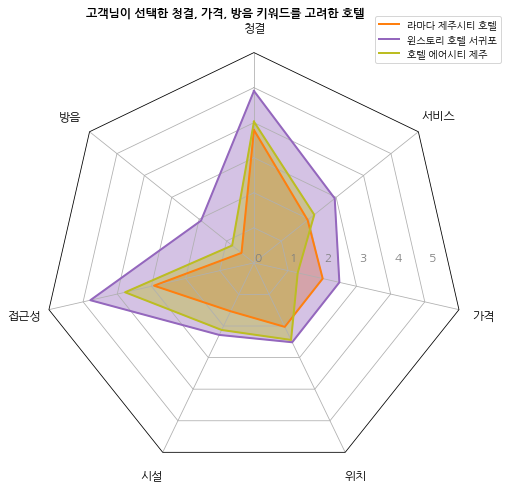

In [38]:
# 3개 호텔에 관한 레이더차트 시각화
labels = final_hotel_radar.columns[1:]
num_labels = len(labels)
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] # 각 등분점
angles += angles[:1] # 시작점으로 다시 돌아와야하므로 시작점 추가

my_palette = plt.cm.get_cmap("tab20", len(keyword_ratio.index))
# colors.ListedColormap(['lightpink', 'skyblue', 'green'])
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)

for i, row in final_hotel_radar.iterrows():
  color = my_palette(i)
  data = final_hotel_radar.loc[i].drop('호텔').tolist()# 호텔이름 칼럼 드랍
  data += data[:1]

  ax.set_theta_direction(-1) # 그려지는 방향 - 시계방향으로 설정
  ax.set_theta_offset(pi / 2) # 시작점
  ax.tick_params(axis='x', which='major', pad=15) # x축과 눈금 사이에 여백

  plt.xticks(angles[:-1], labels, color='black', size=12)
  plt.yticks([0,1,2,3,4,5],['0','1','2','3','4','5'], color='grey', fontsize=12) # y축 눈금 설정
  plt.ylim(0,6)
  ax.set_rlabel_position(90) # y축 각도 설정(degree 단위)

  ax.plot(angles, data, linewidth=2, color=color, linestyle='solid', label=row.호텔) # 레이더 차트 출력
  ax.fill(angles, data, color=color, alpha=0.4) # 도형 안쪽에 색 채움

for g in ax.yaxis.get_gridlines(): ## grid line 
    g.get_path()._interpolation_steps = len(labels)

spine = Spine(axes=ax,
          spine_type='circle',
          path=Path.unit_regular_polygon(len(labels)))

## Axes의 중심과 반지름을 맞춰줌
spine.set_transform(Affine2D().scale(.5).translate(.5, .5)+ax.transAxes)
ax.spines = {'polar':spine} ## frame의 모양을 원에서 폴리곤으로 바꿔줌

plt.title('고객님이 선택한 %s, %s, %s 키워드를 고려한 호텔' % (keyword1, keyword2, keyword3), size=12, weight='bold', color='black', x=0.1, y=1.0, ha='left') # 타이틀
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0, 0.1, 0.1))
plt.show()

In [39]:
# 위 셀을 진행한 후, 그에 맞는 호텔 3개 지도 시각화
for i in range(len(final_hotel)):
  final_hotel_info = final_hotel_info.append(hotel_info_df[final_hotel[i] == hotel_info_df['Hotel']])
  final_hotel_keyword_top5 = final_hotel_keyword_top5.append(hotel_keyword_top5[final_hotel[i] == hotel_keyword_top5['hotel_name']])

final_map = folium.Map(location=[33.36249,126.52908], zoom_start=10)
make_map(final_map)
final_map

## 참고: 호텔별 레이더차트

In [40]:
# labels = final_hotel_radar.columns[1:]
# num_labels = len(labels)

# data = final_hotel_radar.iloc[0].drop('호텔').values.flatten().tolist()
# data += data[:1]

# angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] # 각 등분점
# angles += angles[:1] # 시작점으로 다시 돌아와야하므로 시작점 추가
# my_palette = plt.cm.get_cmap("tab20", len(keyword_ratio.index))

# fig = plt.figure(figsize=(15,20))
# fig.set_facecolor('white')

# for i, row in final_hotel_radar.iterrows():
#   color = my_palette(i)
#   data = final_hotel_radar.loc[i].drop('호텔').tolist()# 호텔이름 칼럼 드랍
#   data += data[:1]
#   fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7), subplot_kw=dict(polar=True))

#   ax.set_theta_direction(-1) # 그려지는 방향 시계방향
#   ax.set_theta_offset(pi / 2) # 시작점
#   ax.tick_params(axis='x', which='major', pad=15) # x축과 눈금 사이에 여백

#   plt.xticks(angles[:-1], labels, color='grey', size=13)
#   plt.yticks([0,1,2,3,4,5],['0','1','2','3','4','5'], color='grey', fontsize=12) # y축 눈금 설정
#   plt.ylim(0, 5)
#   ax.set_rlabel_position(90) # y축 각도 설정(degree 단위)

#   ax.plot(angles, data, linewidth=2, color=color, linestyle='solid') # 레이더 차트 출력
#   ax.fill(angles, data, color=color, alpha=0.4) # 도형 안쪽에 색 채움.
#   plt.title(row.호텔, size=20, weight='bold', color='black', x=-0.2, y=1.2, ha='left') # 타이틀은 호텔이름
#   plt.tight_layout(pad=5) ## subplot간 패딩 조절
#   plt.show()